In [1]:
# define logging and working directory
from ProjectRoot import change_wd_to_project_root
change_wd_to_project_root()
from src.utils.Notebook_imports import *
import random
from collections import Counter
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 30})
import pandas as pd
import numpy as np
import os

from ipywidgets import interact
import ipywidgets as widgets
from IPython.core.display import display, HTML
%matplotlib inline
%reload_ext autoreload
%autoreload 2

search for root_dir and set working directory
Working directory set to: /mnt/ssd/git/dynamic-cmr-models


# Heart phases

[source](https://next.amboss.com/de/article/xL0E-g)

Systole
1.) Anspannungsphase

    Hauptfunktion: Ventrikel kontrahieren sich
    Ablauf
        Alle Klappen sind geschlossen und die Ventrikel sind mit Blut gefüllt
        Isovolumetrische Kontraktion des Arbeitsmyokards 

    Druckanstieg in den Ventrikeln, bis der Druck in der Aorta bzw. dem Truncus pulmonalis überschritten ist
    Passive Öffnung der Taschenklappen (Pulmonal- und Aortenklappe) → Beginn der Austreibungsphase

Status des linken Ventrikels

    Druck: Anstieg von ca. 8 mmHg auf ca. 80 mmHg 

Volumen: Gleichbleibend ca. 150 mL (isovolumetrische Anspannung)
2.) Austreibungsphase

    Hauptfunktion: Blut wird aus Ventrikeln in Kreislauf und Lunge gepumpt
    Ablauf
        Blut strömt aus den Ventrikeln in den Truncus pulmonalis bzw. die Aorta (Großteil bereits zu Beginn der Austreibungsphase)
        Weitere Kontraktion des Myokards (beginnend am distalen Septum und der Herzspitze)
        Wanddicke der Ventrikel ↑ und Innendurchmesser der Ventrikel ↓
        Druck in den Ventrikeln ↑ (Laplace-Gesetz) → Blutvolumen ↓ im Ventrikel
        Druck ↓ langsam im Ventrikel (bis unter den Druck der Aorta bzw. Truncus pulmonalis)
        Schluss der Taschenklappen → Beginn der Entspannungsphase
    Status des linken Ventrikels
        Druck: Anstieg von ca. 80 mmHg auf ca. 120 mmHg, danach Absinken 

Volumen: Austreibung von ca. 90 mL Schlagvolumen (150 mL → 60 mL)
Diastole
3.) Entspannungsphase

    Hauptfunktion: Ventrikel entspannen sich
    Ablauf
        Alle Herzklappen sind geschlossen (Volumen bleibt konstant)
        Weitere Entspannung des Myokards (Druck ↓ in den Ventrikeln)
        Isovolumetrische Entspannung
        Ventrikeldruck fällt unter den Druck in den Vorhöfen
        Segelklappen öffnen sich → Beginn der Füllungsphase
    Status des linken Ventrikels
        Druck: Absinken auf ca. 10 mmHg 

Volumen: Gleichbleibend ca. 60 mL (isovolumetrische Entspannung)
4.) Füllungsphase

    Hauptfunktion: Ventrikel füllen sich erneut mit Blut
    Ablauf
        Die Ventilebene hebt sich und "stülpt" sich über die Blutsäule in den Vorhöfen (Ventilebenenmechanismus)
        Am Ende der Diastole kontrahieren die Vorhöfe kurz
        Druck im Ventrikel übersteigt den Druck der Vorhöfe
        Schluss Segelklappen → Beginn der Anspannungsphase
    Status des linken Ventrikels
        Druck: ca. 8 mmHg 

Volumen: Füllung mit ca. 90 mL (60 mL → 150 mL)

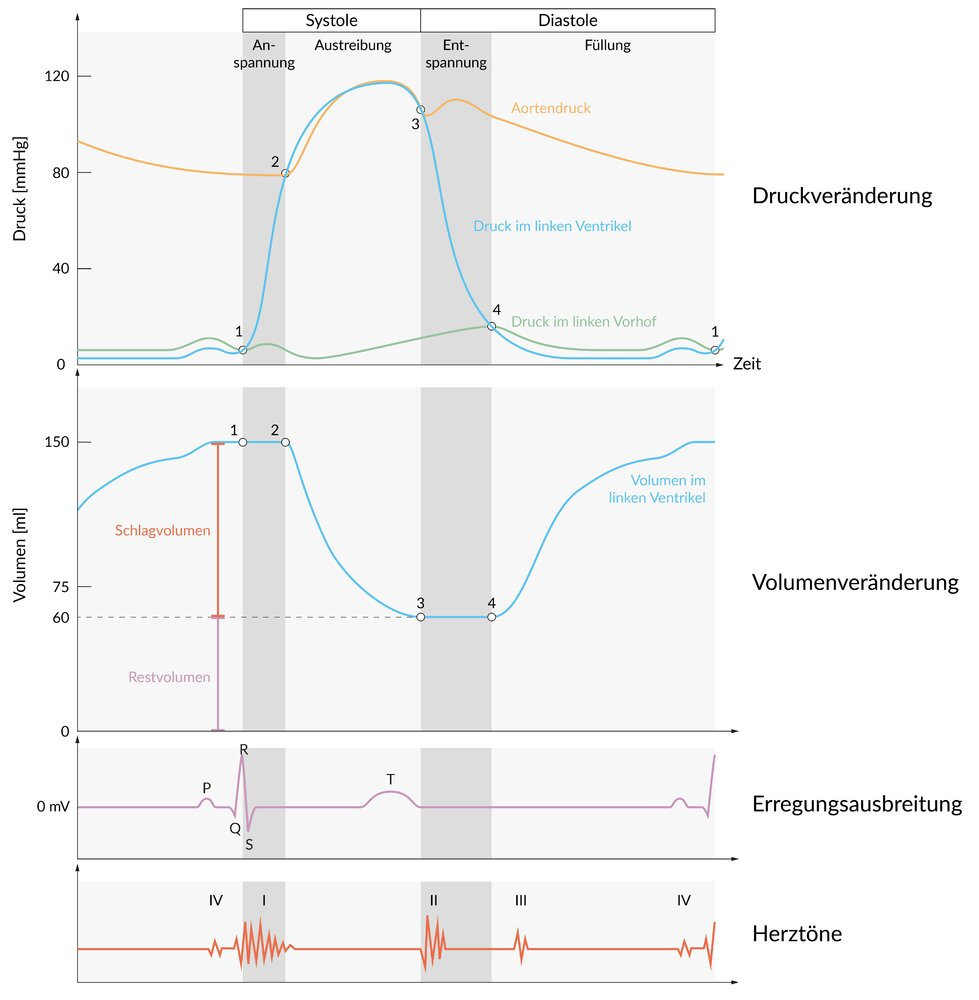

In [2]:
from IPython import display
display.Image("https://media-de.amboss.com/media/thumbs/big_5f22e89d3edf1.jpg")

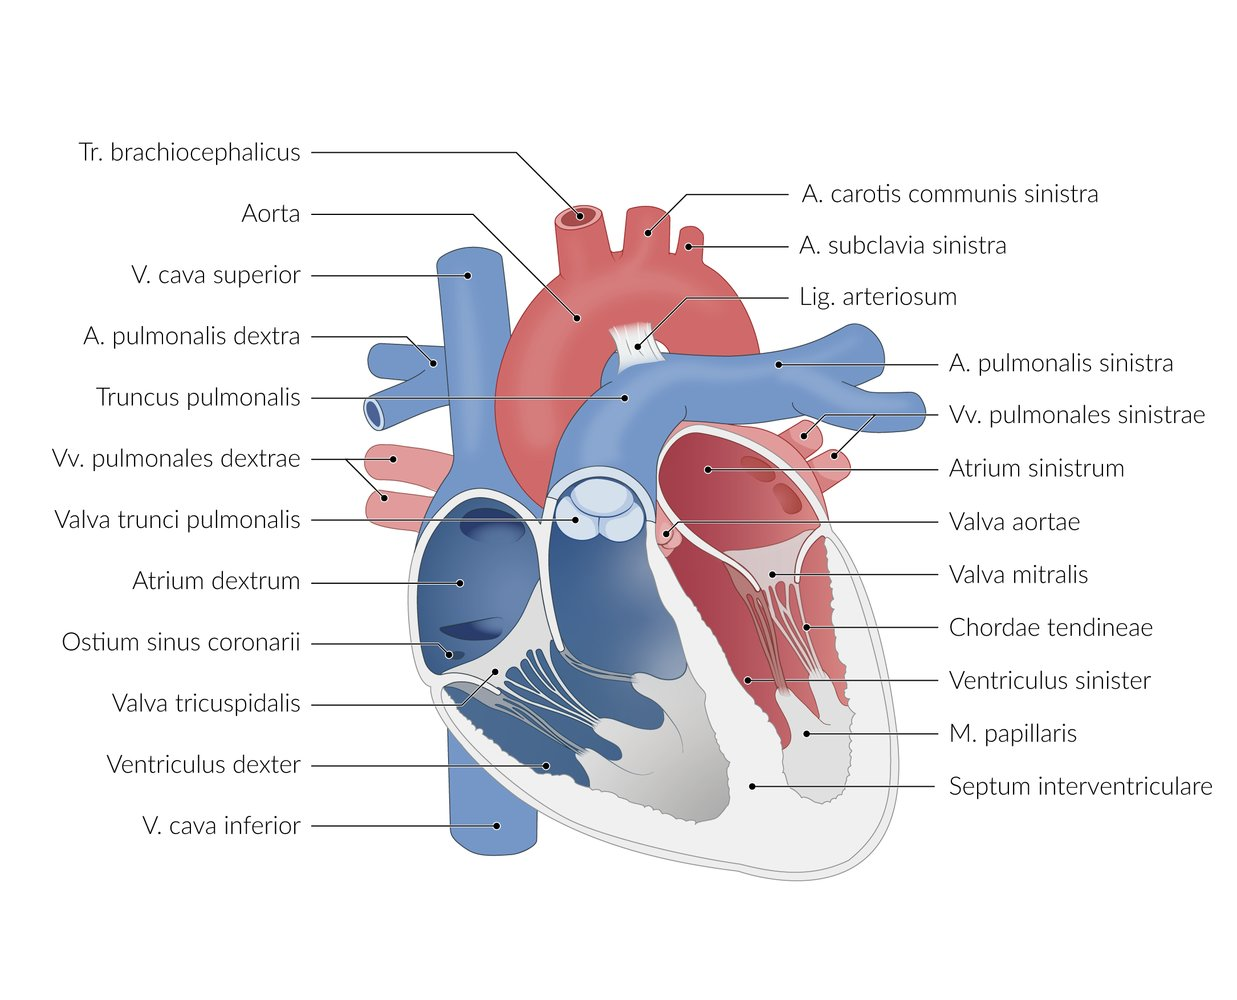

In [29]:
display.Image("https://media-de.amboss.com/media/thumbs/big_5e147f74d36fe.jpg")

In [2]:
from ipyfilechooser import FileChooser
vects_chooser = FileChooser(os.path.join(os.getcwd(),'/mnt/ssd/git/dynamic-cmr-models/exp/phasereg_v3/acdc/'), '')
display(vects_chooser)

FileChooser(path='/mnt/ssd/git/dynamic-cmr-models/exp/phasereg_v3/acdc', filename='', title='HTML(value='', la…

In [3]:
pathtovectnpy = vects_chooser.selected
print(pathtovectnpy)

/mnt/ssd/git/dynamic-cmr-models/exp/phasereg_v3/acdc/24_8_128_128_flow0_norm0_dir1_clstm0_conv0_lstm0/2022-01-17_10_18/moved/vects_f0.npy


In [4]:
nda_vects = np.load(pathtovectnpy)
print(nda_vects.shape)

(25, 40, 16, 64, 64, 3)


# load phase vector as onehot

In [5]:
from ipyfilechooser import FileChooser
path_chooser = FileChooser(os.path.join(os.getcwd(),'/mnt/ssd/git/dynamic-cmr-models/exp/phasereg_v3/acdc/'), '')
display(path_chooser)

FileChooser(path='/mnt/ssd/git/dynamic-cmr-models/exp/phasereg_v3/acdc', filename='', title='HTML(value='', la…

In [6]:
pathtophasenpy = path_chooser.selected
print(pathtophasenpy)

/mnt/ssd/git/dynamic-cmr-models/exp/phasereg_v3/acdc/24_8_128_128_flow0_norm0_dir1_clstm0_conv0_lstm0/2022-01-17_10_18/pred/gtpred_fold0.npy


In [7]:
nda_phase = np.load(pathtophasenpy)
print(nda_phase.shape)

(2, 25, 2, 40, 5)


In [8]:
gt_, pred_ = np.split(nda_phase, axis=0,indices_or_sections=2)
print(gt_.shape)
gt= gt_[0,:,0]
pred = pred_[0,:,0]
print(gt.shape)
gt_len = gt_[0,:,1]

(1, 25, 2, 40, 5)
(25, 40, 5)


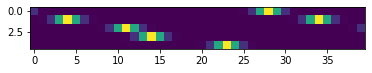

In [9]:
plt.imshow(gt[0].T)

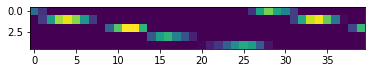

In [10]:
plt.imshow(pred[0].T)

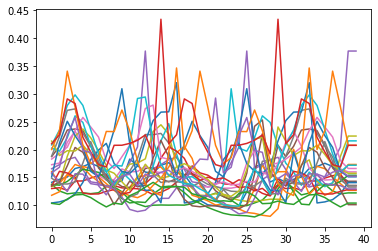

In [11]:
ndas = []
for n in nda_vects:
    ndas.append(np.linalg.norm(n, axis=-1).mean(axis=(1,2,3)))

for n in ndas:
    _ = plt.plot(n)

(40, 16, 64, 64)


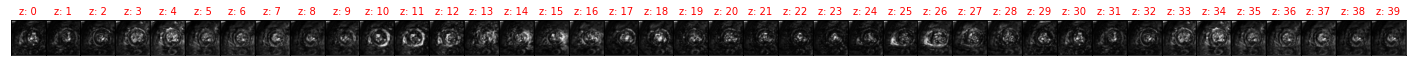

In [12]:
from src.visualization.Visualize import show_2D_or_3D
nda_temp = nda_vects[0]
nda_temp = np.linalg.norm(nda_temp, axis=-1)
print(nda_temp.shape)
_ = show_2D_or_3D(nda_temp[:,8], allow_slicing=False)

In [152]:
np.argmax(gt[0], axis=0)

array([28,  4, 11, 14, 23])

<ipython-input-13-c973cffc1aa8>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ = ax.set_yticklabels(phases)


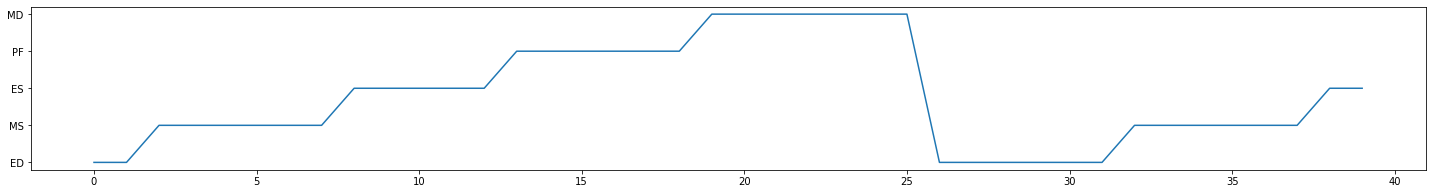

In [13]:
fix, ax = plt.subplots(figsize=(25,3))
plt.plot(np.argmax(gt[0], axis=1))
phases = ['','ED', 'MS', 'ES', 'PF', 'MD','']
_ = ax.set_yticklabels(phases)

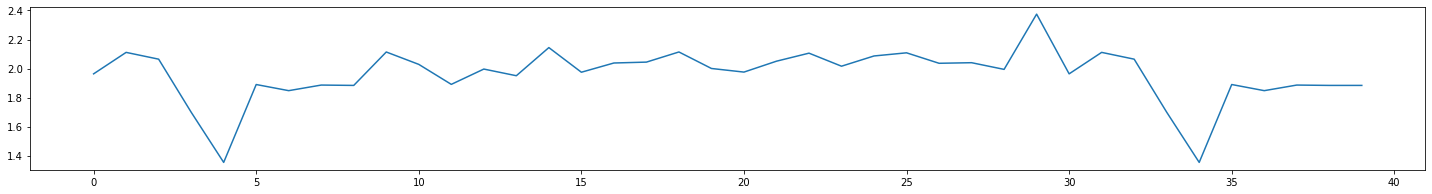

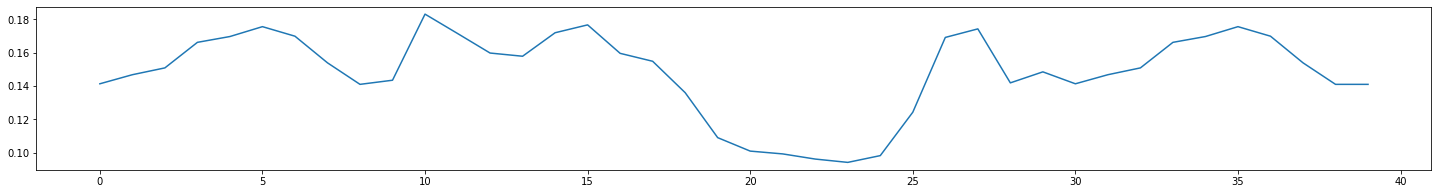

In [14]:
# plot the mean/max norm for one patient oveer time
fix, ax = plt.subplots(figsize=(25,3))
nda_1d_max = np.max(nda_temp,axis=(1,2,3))
nda_1d_mean = np.mean(nda_temp,axis=(1,2,3))
_ = plt.plot(nda_1d_max); plt.show()
fix, ax = plt.subplots(figsize=(25,3))
_ = plt.plot(nda_1d_mean)
#ax.set_ylim(0.0,0.15)

In [15]:
import scipy.signal
import scipy.signal as sig
sig.find_peaks(nda_1d_mean)

(array([ 5, 10, 15, 27, 29, 35]), {})

In [17]:
import tensorflow as tf
import sys
# returns a matrix with the indicies as values, similar to np.indicies
def get_idxs_tf(x):
    return tf.cast(
        tf.reshape(tf.where(tf.ones((x[0], x[1], x[2]))), (x[0], x[1], x[2], 3)),
        tf.float32)


# returns a matrix with vectors pointing to the center
def get_centers_tf(x):
    return tf.cast(
        tf.tile(tf.convert_to_tensor([x[0] // 2, x[1] // 2, x[2] // 2])[tf.newaxis, tf.newaxis, tf.newaxis, ...],
                (x[0], x[1], x[2], 1)), tf.float32)

def get_angle_tf(a, b):
    # this should work for batches of n-dimensional vectors
    # α = arccos[(a · b) / (|a| * |b|)]
    # |v| = √(x² + y² + z²)
    """
    in 3D space
    If vectors a = [xa, ya, za], b = [xb, yb, zb], then:
    α = arccos[(xa * xb + ya * yb + za * zb) / (√(xa2 + ya2 + za2) * √(xb2 + yb2 + zb2))]
    """
    # import math as m
    # pi = tf.constant(m.pi)
    b = tf.cast(b, dtype=a.dtype)
    inner = tf.einsum('...i,...i->...', a, b)
    norms = tf.norm(a, ord='euclidean', axis=-1) * tf.norm(b, ord='euclidean', axis=-1)  # [...,None]
    cos = inner / (norms + sys.float_info.epsilon)
    # rad = tf.math.acos(tf.clip_by_value(cos, -1.0, 1.0))
    # rad2deg conversion
    # deg = rad * (180.0/pi)
    return cos[..., tf.newaxis]

dim = [16,64,64]
idx = get_idxs_tf(dim)
c = get_centers_tf(dim)
#print('centers: ',c.dtype)
centers = c - idx
centers_tensor = centers[tf.newaxis, ...]
flow2direction_lambda = tf.keras.layers.Lambda(
            lambda x: get_angle_tf(x, centers_tensor), name='flow2direction')


(8, 64, 64)
(17,) (17,)
direction shape: (17, 8, 64, 64)


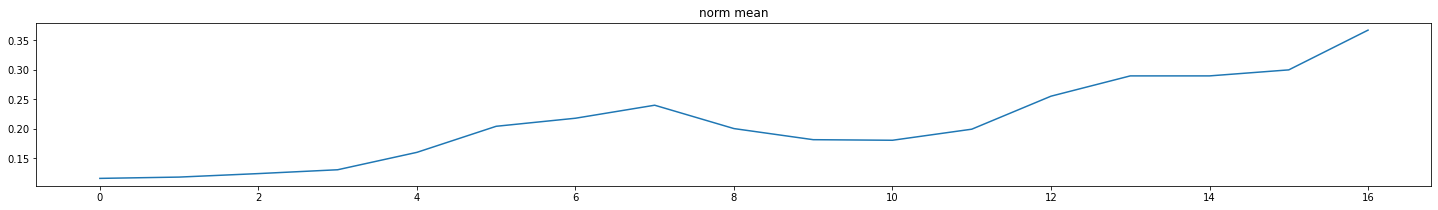

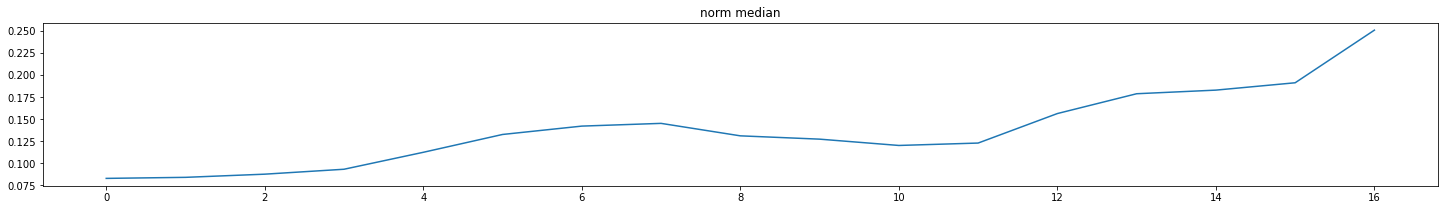

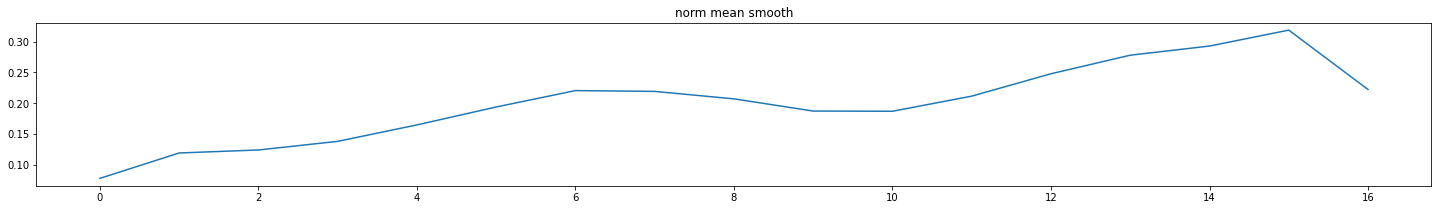

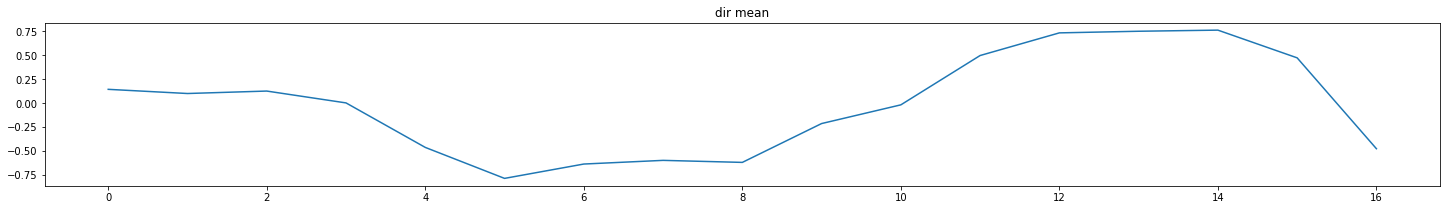

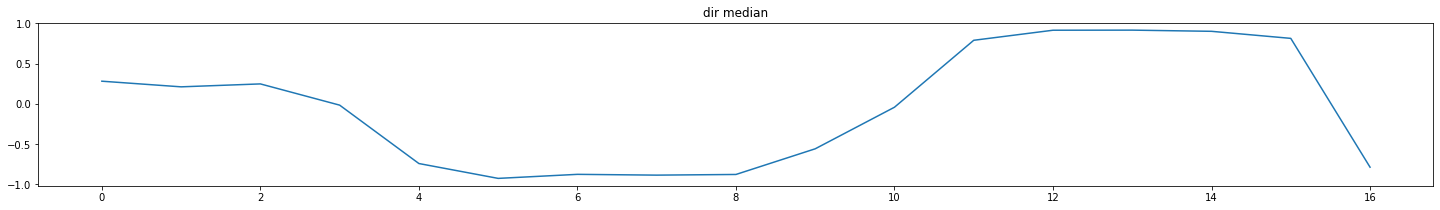

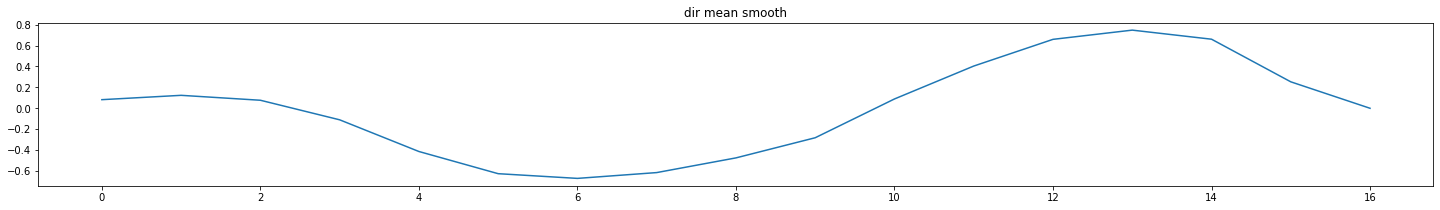

6
0
12
9
ed raw:  19
mod 2
length 17
ed: 2
ms: 6
es: 9
pf: 12
md: 13


(2, 6, 9, 12, 13)

In [124]:
# try to predict the phases unsupervised just from the norm/direction curve
# [28,  4, 11, 14, 23]
# ED = max(norm_max) 28
# MS = min(norm_max) 4
# ES = direction == 0 --> argmin(abs(dir_median))
# PF = last peak of norm_mean before min 14
# MD = min(norm_mean) 23
def get_phases_from_vects(vects_nda, length=-1, plot=True):
    import scipy.signal
    import scipy.signal as sig
    vects_nda = vects_nda[:int(length)]
    vects_nda = vects_nda[:,4:-4]
    dim = vects_nda.shape[1:-1]
    print(dim)
    idx = get_idxs_tf(dim)
    c = get_centers_tf(dim)
    #print('centers: ',c.dtype)
    centers = c - idx
    centers_tensor = centers[tf.newaxis, ...]
    flow2direction_lambda = tf.keras.layers.Lambda(
            lambda x: get_angle_tf(x, centers_tensor), name='flow2direction')
    
    # signal smoothing
    kernel_size = 3
    kernel = np.ones(kernel_size) / kernel_size
    
    # norm of the vector
    norm_nda = np.linalg.norm(vects_nda, axis=-1)
    nda_1d_mean = np.mean(norm_nda,axis=(1,2,3))
    nda_1d_median = np.median(norm_nda,axis=(1,2,3))
    nda_1d_mean_smooth = np.convolve(nda_1d_mean, kernel, mode='same')
    print(nda_1d_mean_smooth.shape, nda_1d_mean.shape)
    
    
    # direction relative to the center
    directions = flow2direction_lambda(vects_nda)[...,0]
    dir_1d_mean = np.mean(directions,axis=(1,2,3))
    dir_1d_median = np.median(directions,axis=(1,2,3))
    dir_1d_mean_smooth = np.convolve(dir_1d_mean, kernel, mode='same')
    print('direction shape:',directions.shape)
    
    # plot the mean/max norm for one patient oveer time
    if plot:
        fig, ax = plt.subplots(figsize=(25,3))
        ax.set_title('norm mean')
        _ = plt.plot(nda_1d_mean); plt.show()
        fig, ax = plt.subplots(figsize=(25,3))
        ax.set_title('norm median')
        _ = plt.plot(nda_1d_median); plt.show()
        fig, ax = plt.subplots(figsize=(25,3))
        ax.set_title('norm mean smooth')
        _ = plt.plot(nda_1d_mean_smooth);plt.show()

        # plot the mean/median smoothed mean direction
        fig, ax = plt.subplots(figsize=(25,3))
        ax.set_title('dir mean')
        _ = plt.plot(dir_1d_mean); plt.show()
        fig, ax = plt.subplots(figsize=(25,3))
        ax.set_title('dir median')
        _ = plt.plot(dir_1d_median); plt.show()
        fig, ax = plt.subplots(figsize=(25,3))
        ax.set_title('dir mean smooth')
        _ = plt.plot(dir_1d_mean_smooth);plt.show()
    
    # find phases
    # try with smoothed direction to avoid small peaks
    dir_1d_mean = dir_1d_mean_smooth
    
    
    ms = np.argmin(dir_1d_mean)
    print(ms)
    
    # first time direction cross 0
    # first find the idx for ms and pf, than where it goes from negative to positive --> es
    temp_ = 0
    negative_slope = False
    for idx,elem in enumerate(dir_1d_mean):
        if elem<0:
            negative_slope=True
            temp_ = idx
        if elem>0 and negative_slope:
            #print('last idx before negative: ',temp_)
            break
    es = temp_
    
    md = np.argmin(nda_1d_mean)
    print(md)
    
    if md<es:
        md = es + ((length-es)//2) # halfe way from ES to end
    pf = es + np.argmax(dir_1d_mean[es:md])    
    print(pf)
    

    
    
    #es = ms + np.where(dir_1d_mean[ms:pf]>=0)[0][0] 
    print(es)
    # ed is between md and ms where dir mean first time smaller 0
    cycle = np.concatenate([dir_1d_mean[md:][::-1], dir_1d_mean[:ms]])
    #print(cycle)
    temp_ = 0
    positive_slope = False
    for idx,elem in enumerate(cycle):
        if elem>0:
            positive_slope=True
            temp_ = idx
        if elem<0 and positive_slope:
            #print('last idx before negative: ',temp_)
            break
    ed_raw = md + temp_
    
    # this is bad if direction at MD is negative, we need to find the idx when first time negative
    # ed_raw = md + np.where(cycle<=0)[0][0] # first time direction cross 0
    print('ed raw: ', ed_raw)
    if ed_raw>=length:
        ed_raw = np.mod(ed_raw,length)
        print('mod', ed_raw)
        print('length', length)
    ed = ed_raw
    print('ed:', ed)
    print('ms:', ms)
    print('es:', es)
    print('pf:', pf)
    print('md:', md)
    
    return ed,ms,es,pf,md
    
get_phases_from_vects(nda_vects[10], int(gt_len[10,:,0].sum()))

In [125]:
@interact
def compare_phases(i=(0,nda_vects.shape[0]-1), plot=True):
    
    phases = ['','ED', 'MS', 'ES', 'PF', 'MD','']
    print(phases[1:-1])
    print('gt:', np.argmax(gt[i],axis=0))
    fix, ax = plt.subplots(figsize=(25,4))
    
    
    cardiac_cycle_length = int(gt_len[i,:,0].sum())
    print(gt[i][:cardiac_cycle_length].T.shape)
    plt.imshow(gt[i][:cardiac_cycle_length].T)
    
    _ = ax.set_yticklabels(phases);plt.show()
    
    p = get_phases_from_vects(nda_vects[i], length=cardiac_cycle_length, plot=plot)
    print(p)
    
    fix, ax = plt.subplots(figsize=(25,4))
    plt.imshow(pred[i][:cardiac_cycle_length].T)
    _ = ax.set_yticklabels(phases);plt.show()

interactive(children=(IntSlider(value=12, description='i', max=24), Checkbox(value=True, description='plot'), …

In [102]:
np.mod(10,10)

0

In [51]:
directions = flow2direction_lambda(nda_vects[0:1])

In [52]:
directions.shape

TensorShape([1, 40, 16, 64, 64, 1])

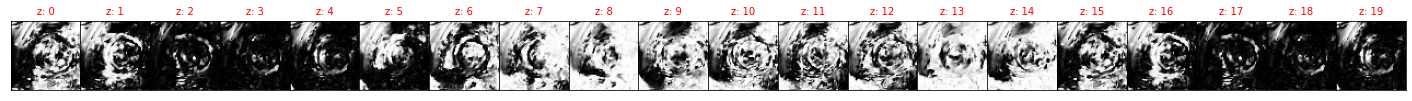

In [53]:
_ = show_2D_or_3D(directions[0,:,8])

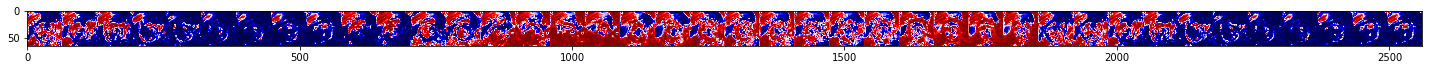

In [61]:
# direction
fix, ax = plt.subplots(figsize=(25,5))
temp_dir = directions[0,:,8,...,0]
plt.imshow(np.reshape(temp_dir, (40*64,64)).T, cmap='seismic')

(1, 40, 16, 64, 64)


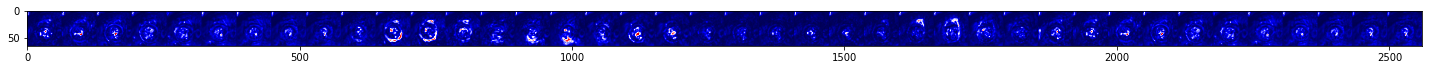

In [75]:
# norm
fix, ax = plt.subplots(figsize=(25,5))
norm_nda = np.linalg.norm(nda_vects[0:1], axis=-1)
print(norm_nda.shape)
temp_dir = norm_nda[0,:,8]
plt.imshow(np.reshape(temp_dir, (40*64,64)).T, cmap='seismic')

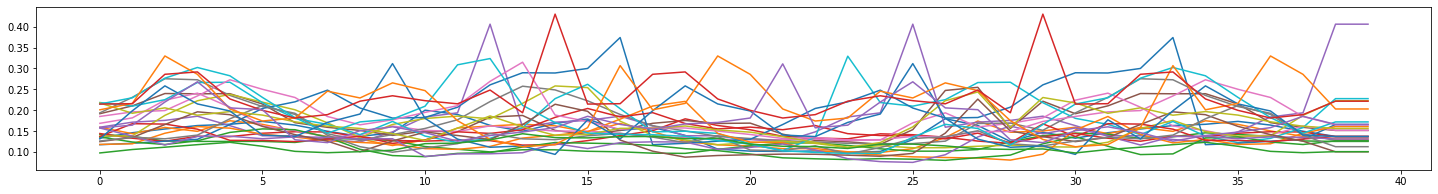

In [78]:
fix, ax = plt.subplots(figsize=(25,3))
ndas = []
for n in nda_vects:
    ndas.append(np.linalg.norm(n[:,6:10], axis=-1).mean(axis=(1,2,3)))

for n in ndas:
    _ = plt.plot(n)
#ax.set_ylim(0.1,0.3)

(40, 16)
(40, 16)


(40, 16)


<ipython-input-206-96899f262ef6>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ = ax.set_yticklabels(phases)


(40, 16)


<ipython-input-206-96899f262ef6>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ = ax.set_yticklabels(phases)


(40, 16)


<ipython-input-206-96899f262ef6>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ = ax.set_yticklabels(phases)


<ipython-input-206-96899f262ef6>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ = ax.set_yticklabels(phases)


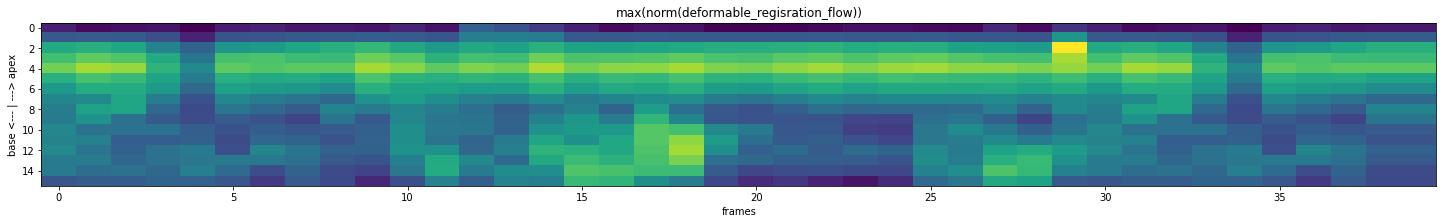

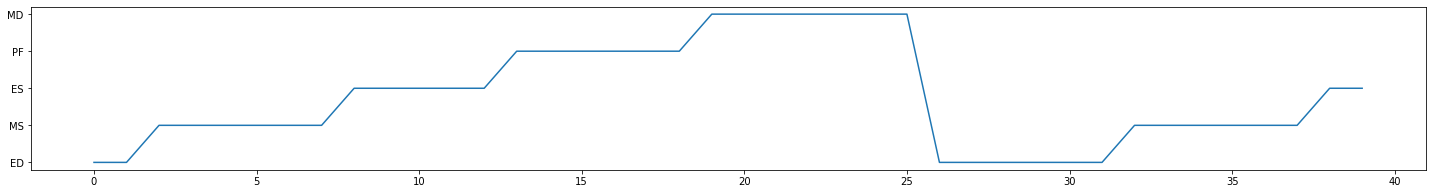

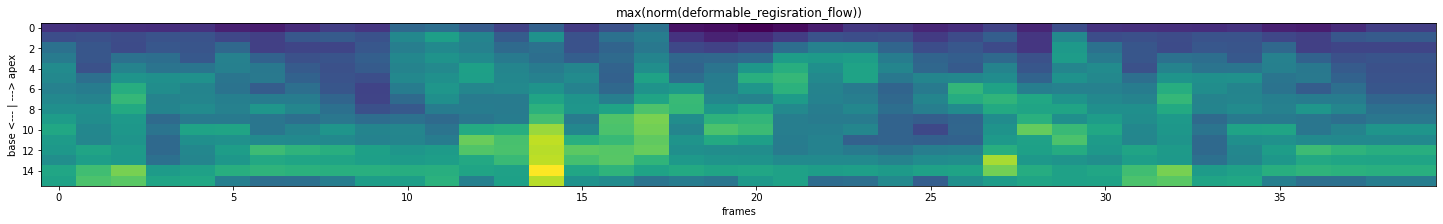

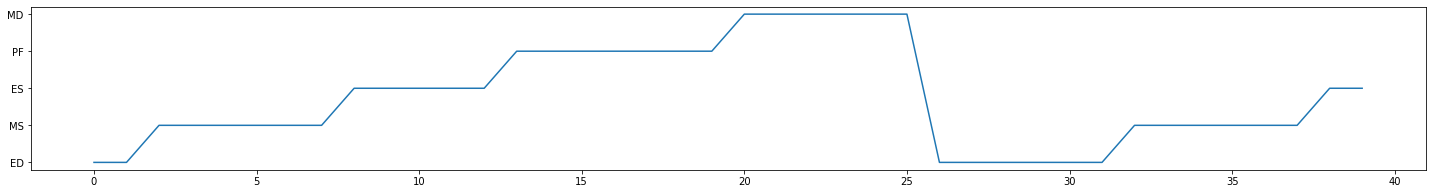

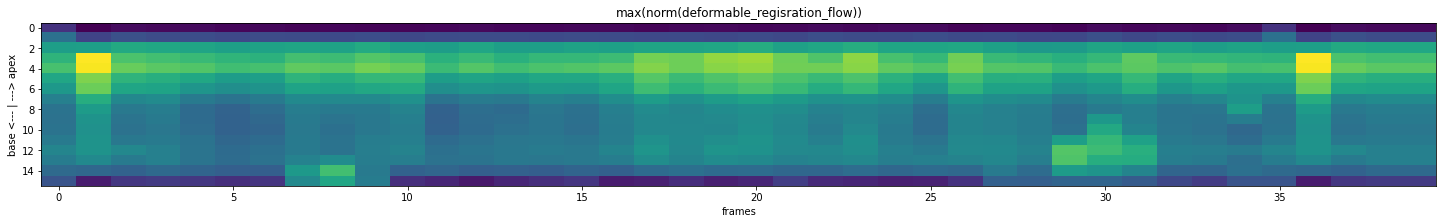

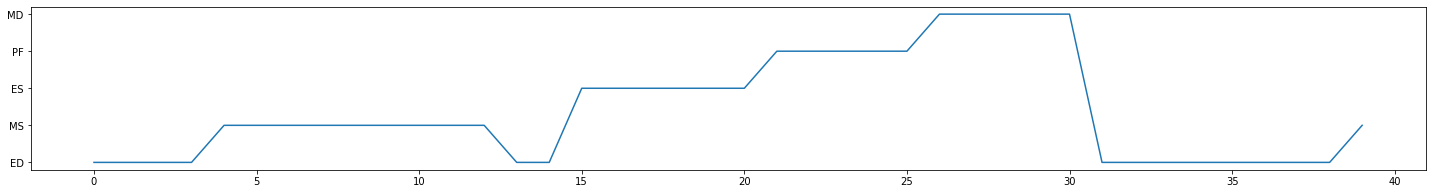

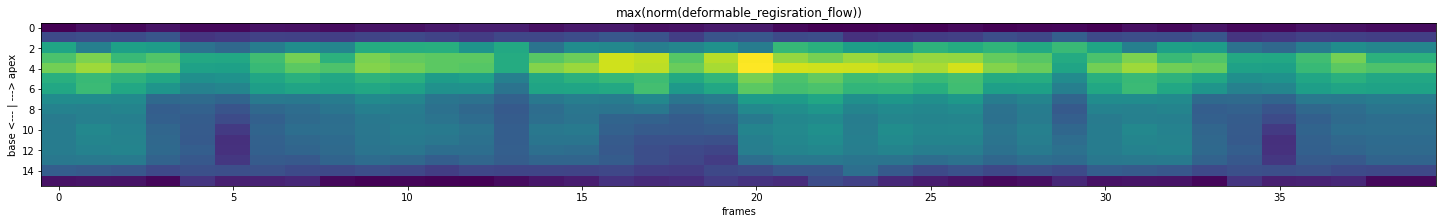

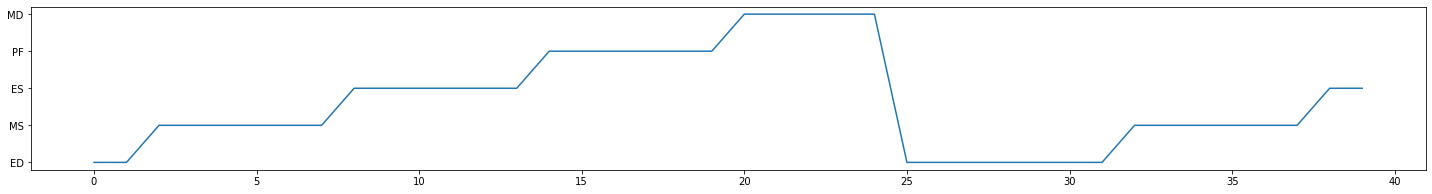

In [206]:
# plot vector norm (t x z) and the gt phases for n patientens
ndas = []
for n in nda_vects:
    ndas.append(np.linalg.norm(n, axis=-1).max(axis=(2,3)))
print(ndas[0].shape)
for i in range(len(ndas))[0:4]:
    fig, ax = plt.subplots(figsize=(25,3))
    n = ndas[i]
    print(n.shape)
    _ = plt.imshow(n.T, aspect='auto')
    _ = ax.set_title('max(norm(deformable_regisration_flow))')
    _ =ax.set_ylabel('base <--- | ---> apex')
    _ =ax.set_xlabel('frames')
    
    fix, ax = plt.subplots(figsize=(25,3))
    plt.plot(np.argmax(gt[i], axis=1))
    phases = ['','ED', 'MS', 'ES', 'PF', 'MD','']
    _ = ax.set_yticklabels(phases)


# compare excel with original phase for ED and ES

In [207]:
patient_paths = sorted(glob.glob('/mnt/ssd/data/acdc/orig_save/all/*/Info.cfg'))
print(len(patient_paths))
print(patient_paths[0:5])

100
['/mnt/ssd/data/acdc/orig_save/all/patient001/Info.cfg', '/mnt/ssd/data/acdc/orig_save/all/patient002/Info.cfg', '/mnt/ssd/data/acdc/orig_save/all/patient003/Info.cfg', '/mnt/ssd/data/acdc/orig_save/all/patient004/Info.cfg', '/mnt/ssd/data/acdc/orig_save/all/patient005/Info.cfg']


In [208]:
patient_paths = [p for p in patient_paths if '090' not in p]
print(len(patient_paths))
print(patient_paths[0:5])

99
['/mnt/ssd/data/acdc/orig_save/all/patient001/Info.cfg', '/mnt/ssd/data/acdc/orig_save/all/patient002/Info.cfg', '/mnt/ssd/data/acdc/orig_save/all/patient003/Info.cfg', '/mnt/ssd/data/acdc/orig_save/all/patient004/Info.cfg', '/mnt/ssd/data/acdc/orig_save/all/patient005/Info.cfg']


In [209]:
patients = [os.path.basename(os.path.dirname(p)) for p in patient_paths]
print(len(patients))
print(patients[0:5])

99
['patient001', 'patient002', 'patient003', 'patient004', 'patient005']


In [210]:
file_4d = glob.glob(os.path.join(os.path.dirname(patient_paths[94]), '*4d.nii.gz'))
print(file_4d)
frames_total = sitk.GetArrayFromImage(sitk.ReadImage(file_4d[0])).shape[0]
print(frames_total)

['/mnt/ssd/data/acdc/orig_save/all/patient096/patient096_4d.nii.gz']
15


In [211]:
import yaml
def read_cfg_file(f):
    """Helper to open cfg files"""
    with open(f, 'r') as yml_file:
        cfg = yaml.load(yml_file, Loader=yaml.FullLoader)
    return cfg

def get_idx(cfg_f):
    patient = os.path.basename(os.path.dirname(cfg_f))
    patient_short = patient.split('patient')[1]
    cfg = read_cfg_file(cfg_f)
    file_4d = glob.glob(os.path.join(os.path.dirname(cfg_f), '*4d.nii.gz'))
    frames_total = sitk.GetArrayFromImage(sitk.ReadImage(file_4d[0])).shape[0]
    frames_total_cfg = int('{:02}'.format(cfg.get('NbFrame', 'NOPHASE')))
    if frames_total != frames_total_cfg:
        print('patient: {} total: {}, total cfg: {}'.format(patient_short, frames_total, frames_total_cfg))
    frame_ed = '{:02}'.format(cfg.get('ED', 'NOPHASE'))
    frame_es = '{:02}'.format(cfg.get('ES', 'NOPHASE'))
    return patient_short, int(frame_ed), int(frame_es), int(frames_total)

In [212]:
idxs = [get_idx(c) for c in patient_paths]

In [213]:
df = pd.DataFrame(idxs, columns=['patient', 'ED#', 'ES#', 'total'])
df

,patient,ED#,ES#,total
0,001,1,12,30
1,002,1,12,30
2,003,1,15,30
3,004,1,15,28
4,005,1,13,30
...,...,...,...,...
94,096,1,8,15
95,097,1,11,30
96,098,1,9,22
97,099,1,9,19


In [214]:
df_phase_file = '/mnt/ssd/data/acdc/original/SAx_3D_dicomTags_phase.csv'
df_phase = pd.read_csv(df_phase_file,dtype={'patient':str, 'ED#':int, 'MS#':int, 'ES#':int, 'PF#':int, 'MD#':int})
df_phase = df_phase[['patient', 'ED#','ES#']]
df_phase

,patient,ED#,ES#
0,001,29,12
1,002,29,11
2,003,28,14
3,004,0,13
4,005,29,12
...,...,...,...
94,096,0,6
95,097,28,10
96,098,21,8
97,099,0,6


In [215]:
df_phase['total'] = df['total']
df_phase['ED_orig'] = df['ED#']
df_phase['ES_orig'] = df['ES#']

df_phase['ED_orig'] = df_phase['ED_orig'] -1
df_phase['ES_orig'] = df_phase['ES_orig'] -1
df_phase['ED_diff'] = df_phase['ED#'] == df_phase['ED_orig']
df_phase['ES_diff'] = df_phase['ES#'] == df_phase['ES_orig']

In [216]:
df_phase['ED_diff'].sum()

21

In [217]:
df_phase['ES_diff'].sum()

51

In [218]:
df_phase['ED#'][0], df_phase['ED_orig'][0], df_phase['total'][0]

(29, 0, 30)

In [219]:
import tensorflow as tf
def get_min_distance(vals):

    smaller = tf.reduce_min(vals[0:2], keepdims=True)
    bigger = tf.reduce_max(vals[0:2], keepdims=True)
    mod = vals[2]

    diff = bigger - smaller
    diff_ring = tf.math.abs(mod - bigger + smaller)# we need to use the abs to avoid 0 - 0
    min_diff = tf.reduce_min(tf.stack([diff, diff_ring]))
    tf.math.greater_equal(min_diff, 0) # this is an int, as we measure the distance between buckets for the metric
    return min_diff


ed_dist_lambda = lambda x : get_min_distance([x['ED#'], x['ED_orig'], x['total']]).numpy()
es_dist_lambda = lambda x : get_min_distance([x['ES#'], x['ES_orig'], x['total']]).numpy()

In [220]:
df_phase['ED_dist'] = df_phase.apply(ed_dist_lambda, axis=1)
df_phase['ES_dist'] = df_phase.apply(es_dist_lambda, axis=1)

In [221]:
df_phase

,patient,ED#,ES#,total,ED_orig,ES_orig,ED_diff,ES_diff,ED_dist,ES_dist
0,001,29,12,30,0,11,False,False,1,1
1,002,29,11,30,0,11,False,True,1,0
2,003,28,14,30,0,14,False,True,2,0
3,004,0,13,28,0,14,True,False,0,1
4,005,29,12,30,0,12,False,True,1,0
...,...,...,...,...,...,...,...,...,...,...
94,096,0,6,15,0,7,True,False,0,1
95,097,28,10,30,0,10,False,True,2,0
96,098,21,8,22,0,8,False,True,1,0
97,099,0,6,19,0,8,True,False,0,2


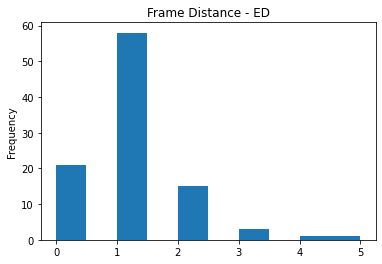

In [222]:
ax = df_phase['ED_dist'].plot(kind='hist')
_ = ax.set_title('Frame Distance - ED')

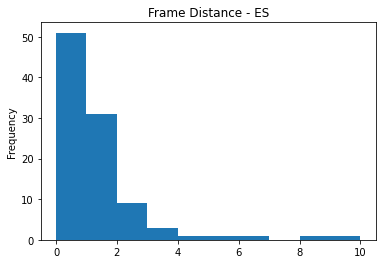

In [223]:
ax = df_phase['ES_dist'].plot(kind='hist')
_ =ax.set_title('Frame Distance - ES')

<AxesSubplot:>

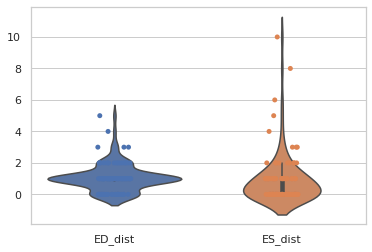

In [224]:
import seaborn as sb
sb.set_theme(style="whitegrid")
sb.violinplot(data=df_phase[['ED_dist','ES_dist']])
sb.stripplot(data=df_phase[['ED_dist','ES_dist']])

In [225]:
from ipywidgets import interact, widgets
@interact
def inspect_frame_diffs(patients='', 
                        ed_diff=(widgets.IntSlider(min=0,max=15,step=1,value=15)),
                        es_diff=(widgets.IntSlider(min=0,max=15,step=1,value=15)),
                       greater_as=False):
    temp = df_phase.copy()
    if len(patients) > 0:
        temp = df_phase[df_phase['patient'].str.contains(patients)]
    if greater_as:
        temp = temp[(temp['ED_dist']>=ed_diff) | (temp['ES_dist']>=es_diff)]
    else:
        temp = temp[(temp['ED_dist']<=ed_diff) | (temp['ES_dist']<=es_diff)]
    print(temp.shape)
    return temp

interactive(children=(Text(value='', description='patients'), IntSlider(value=15, description='ed_diff', max=1…